## Grafs 23/24 - Sheet 4 - Due 3 December 2023

# Weights and distances

### Weighted graphs

Sage graphs admit edge labels, which can be used to indicate edge weights. 

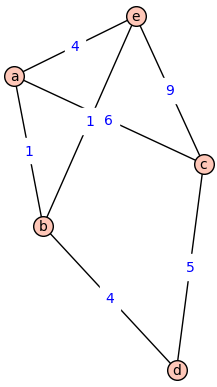

[('a', 'b', 1), ('a', 'c', 6), ('a', 'e', 4), ('b', 'e', 1), ('b', 'd', 4), ('c', 'e', 9), ('c', 'd', 5)]
a c 6


In [2]:
G1=Graph()
G1.add_edge('a','b',1)
G1.add_edge('a','c',6)
G1.add_edge('a','e',4)
G1.add_edge('b','e',1)
G1.add_edge('b','d',4)
G1.add_edge('c','d',5)
G1.add_edge('c','e',9)

G1.show(edge_labels=True)

print(G1.edges())

print('a','c', G1.edge_label('a','c'))


You can indicate that a graph `G` is weighted with  `G.weighted(True)`, but this only changes the equality test, that now uses edge weights.

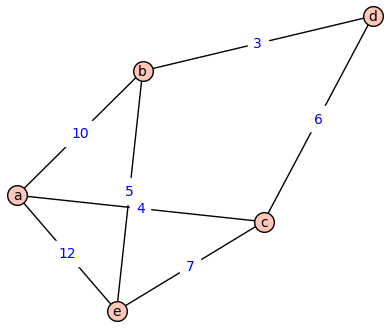

True
False


In [3]:
G2=Graph()
G2.add_edge('a','b',10)
G2.add_edge('a','c',4)
G2.add_edge('a','e',12)
G2.add_edge('b','e',5)
G2.add_edge('b','d',3)
G2.add_edge('c','d',6)
G2.add_edge('c','e',7)

G2.show(edge_labels=True)

print(G1==G2)

G1.weighted(True)
G2.weighted(True)

print(G1==G2)

### Dictionaries

Recall that a python dictionary is an object that allows storing pairs `(key,value)`, and you can access or change the value associated to a key. You can think of a dictionary as a (mathematical) function `f : key -> value`.

In [4]:
prices = {'apple' : 2, 'banana' : 7} #this is a dictionary
print(prices)
print('price of apple =', prices['apple'])

prices['orange'] = 3 #add an element like this
print(prices)

prices['apple'] = 100 #change the value associated to a key like this
print(prices)

prices.pop('apple') #remove an element like this
print(prices)

{'apple': 2, 'banana': 7}
price of apple = 2
{'apple': 2, 'banana': 7, 'orange': 3}
{'apple': 100, 'banana': 7, 'orange': 3}
{'banana': 7, 'orange': 3}


In [5]:
#you can also initialize a dictionary with an iterable collection
squares = {n : n*n for n in range(10)}
print(squares)

{0: 0, 1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 36, 7: 49, 8: 64, 9: 81}


In [6]:
#also if you have a list of keys and a list of values (of the same length)
my_list_x = ['apple', 'banana', 'coconut', 'durian']
my_list_y = [2, 3, 'sold out', 5]
my_dict = {my_list_x[i] : my_list_y[i] for i in range(len(my_list_x))}
print(my_dict)

{'apple': 2, 'banana': 3, 'coconut': 'sold out', 'durian': 5}


In [7]:
#finally, you can iterate over the elements in a dictionary...

#this will only get you the keys (the first component of the pairs)
for u in my_dict:
    print(u)

print()    

#if you want both the easiest way is the following
for u in my_dict:
    print(u,'->',my_dict[u])

apple
banana
coconut
durian

apple -> 2
banana -> 3
coconut -> sold out
durian -> 5


## Exercise 1

Implement Kruskal's algorithm.

The function `Kruskal(G)` should return, given a weighted graph `G`, a minimum spanning tree `T` (as a Sage graph) and the weight of the minimum spanning tree `best_weight`. You may assume `G` is connected.

In [8]:
from sage.rings.infinity import Infinity

def Kruskal(G):
    T = Graph()
    best_weight=0
    #complete here the code for the exercise
    T.add_vertices(G.vertices())
    E = list(G.edges())
    E.sort(key=lambda e: e[2])

    for e in E :
        if T.distance(e[0], e[1]) == +Infinity :
            best_weight += e[2]
            T.add_edge(e)


    return (T, best_weight)

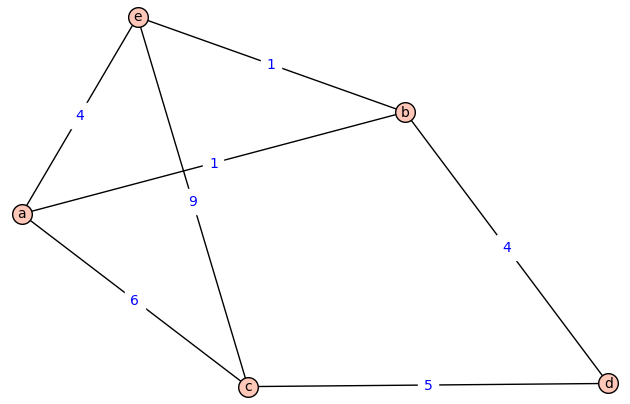

11


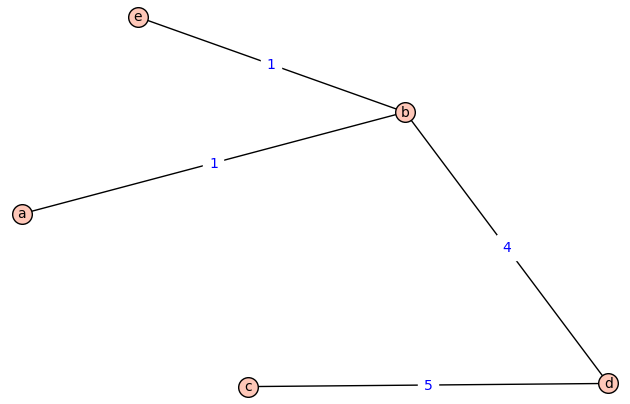

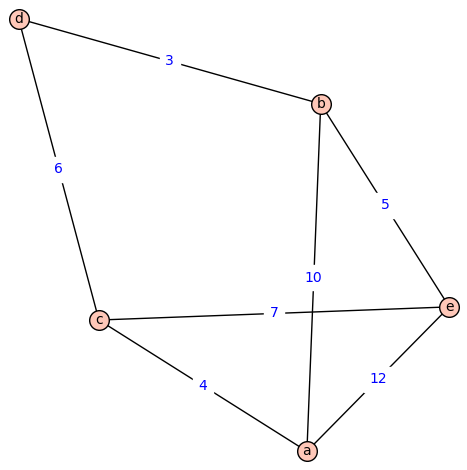

18


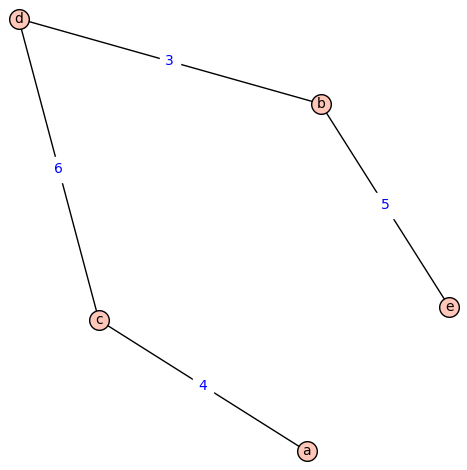

In [9]:

for G in [G1,G2]:

    G.plot(save_pos=True,edge_labels=True).show()
    pos=G.get_pos()

    T,w=Kruskal(G)

    print(w)
    T.plot(pos=pos,edge_labels=True).show()



## Exercise 2

Implement Prim's algorithm.

The function `Prim(G)` should return, given a weighted graph `G`, a minimum spanning tree `T` (as a Sage graph) obtained by using Prim's algorithm with root `v` and the weight of the minimum spanning tree `best_weight`. You may assume `G` is connected.

In [10]:
def Prim(G,v):
    T = Graph()
    best_weight=0

    #complete here the code for exercise 2
    T.add_vertex(v)
   
    while T.order() < G.order() :
        # Extract the lowest weight edge
        min_weight = +Infinity
        min_edge = None
        for v in T.vertices() :
            N = [ n for n in G.neighbors(v) if n not in T.vertices() ]
            for e in [ (v, n, G.edge_label(v, n)) for n in N ] :
                if e[2] < min_weight :
                    min_weight = e[2]
                    min_edge = e
                    
        if min_edge is not None :
            T.add_edge(*e)
            T.add_vertex(e[1])
            best_weight += e[2]
    
    return (T, best_weight)

In [11]:
def Prim(G, v) :
    T = Graph()
    best_weight=0

    #complete here the code for exercise 2
    T.add_vertex(v)
    
    while T.order() < G.order() :
        E = [ e for e in G.edges()
              if (e[0] in T.vertices() and e[1] not in T.vertices())
              or (e[1] in T.vertices() and e[0] not in T.vertices()) ]
        
        min_edge = None
        min_weight = +Infinity
        for e in E :
            w = G.edge_label(e[0], e[1])
            if min_weight > w :
                min_edge = e
                min_weight = w
                    
        if min_edge is not None :
            T.add_edge(min_edge)
            best_weight += min_weight
    
    return (T, best_weight)

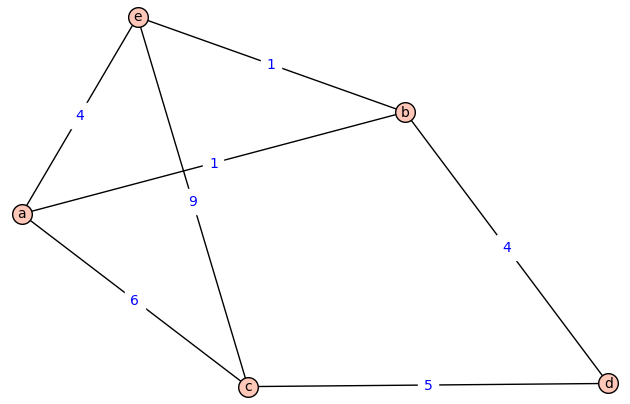

11


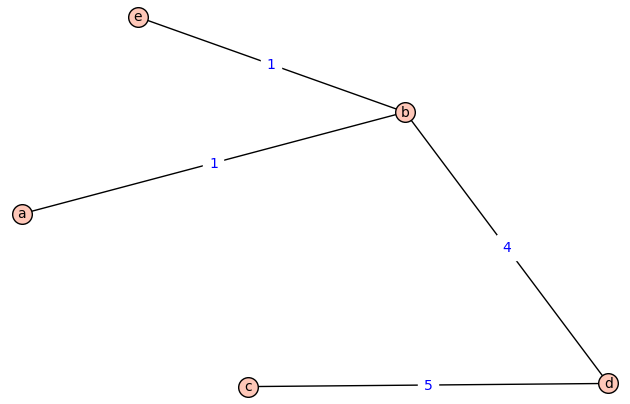

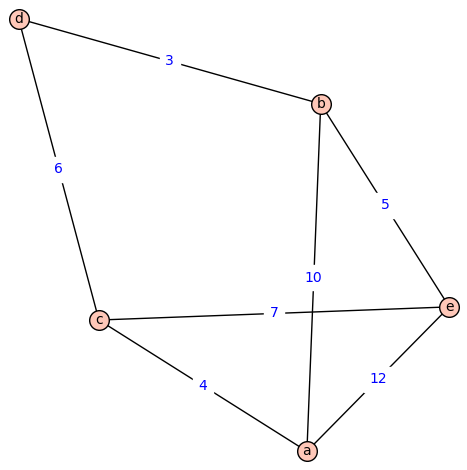

18


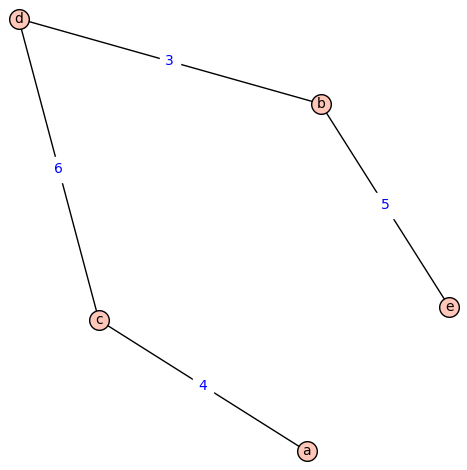

In [12]:
for G in [G1,G2]:

    G.plot(save_pos=True,edge_labels=True).show()
    pos=G.get_pos()

    T,w=Prim(G,G.vertices()[0])

    print(w)
    T.plot(pos=pos,edge_labels=True).show()

## Exercise 3

Implement Dijkstra's algorithm.
<!-- using a `heapq`. -->
Given a weighted graph `G` and a root vertex `v`, the function `Dijkstra(G,v)` should return a dictionary `dist` of distances (return `dist[u] = Infinity` if the vertices `v` and `u` are not connected) from `v` to all vertices of `G`, and a spanning tree `T` such that $dist_T(u,v)=dist_G(u,v)$ for all vertices $u\in G$.

In [13]:
from sage.rings.infinity import Infinity

def Dijkstra(G,v):
    dist={u:Infinity for u in G.vertices()} #this is a python dictionary
    dist[v]=0
    
    T=Graph()
    #complete here the code for Exercise 2
    parent = {u:v for u in G.vertices()}
    V = Set(G.vertices())

    while len(V) > 0 and min([dist[w] for w in V]) < +Infinity :
    ## Take w from V\T that minimizes D(w)
        w = min(V, key=lambda x: dist[x])
        T.add_vertex(w)
        V -= Set([w]) 
        if w != v :
            T.add_edge(w, parent[w], G.edge_label(w, parent[w]))
        
        for u in Set(G.neighbors(w)).difference(T.vertices()) :
            if G.edge_label(w, u) + dist[w] < dist[u] :
                dist[u] = G.edge_label(w, u) + dist[w]
                parent[u] = w        
    
    return T,dist

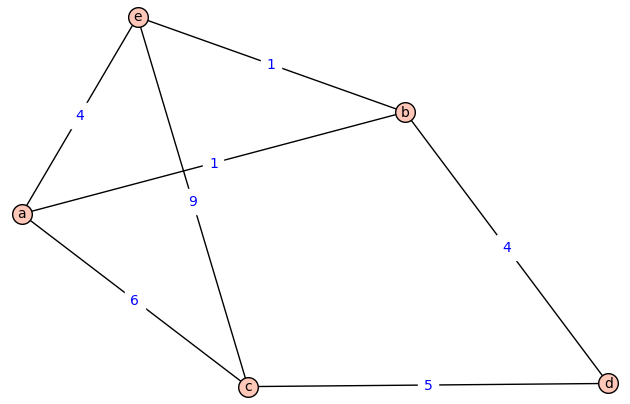

{'a': 0, 'b': 1, 'c': 6, 'e': 2, 'd': 5}


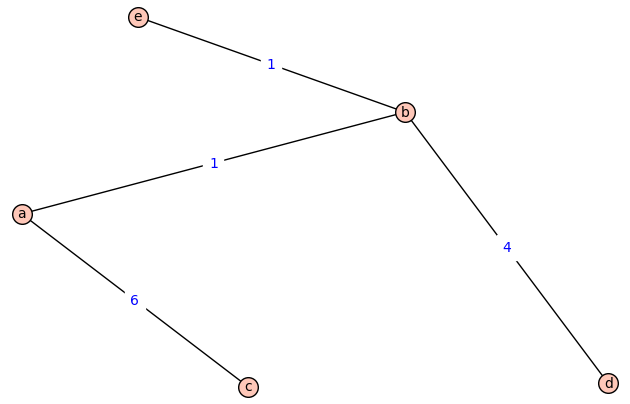

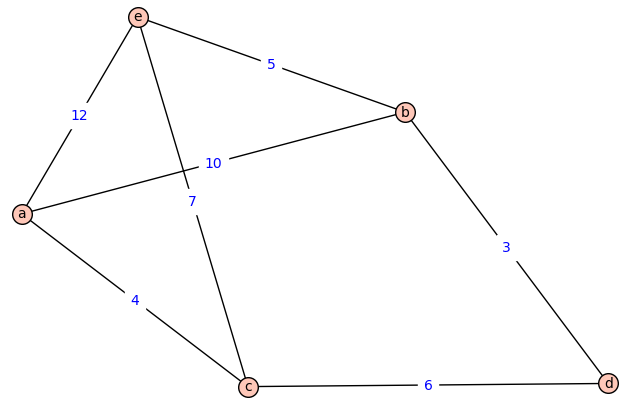

{'a': 0, 'b': 10, 'c': 4, 'e': 11, 'd': 10}


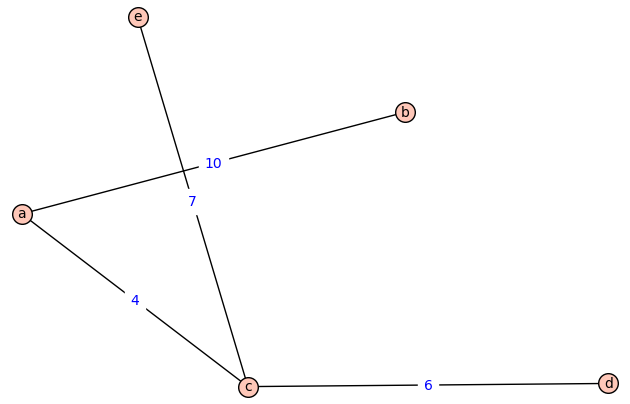

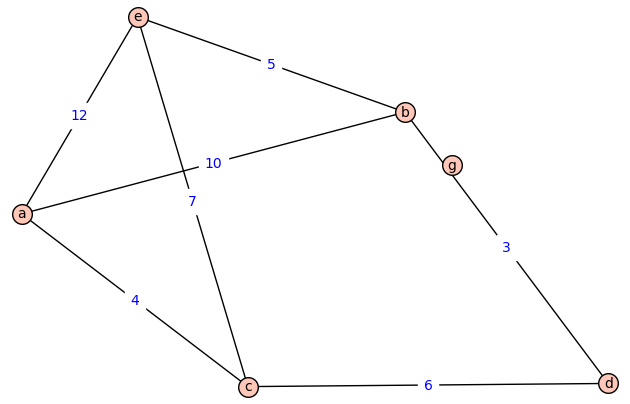

{'a': 0, 'b': 10, 'c': 4, 'e': 11, 'd': 10, 'g': +Infinity}


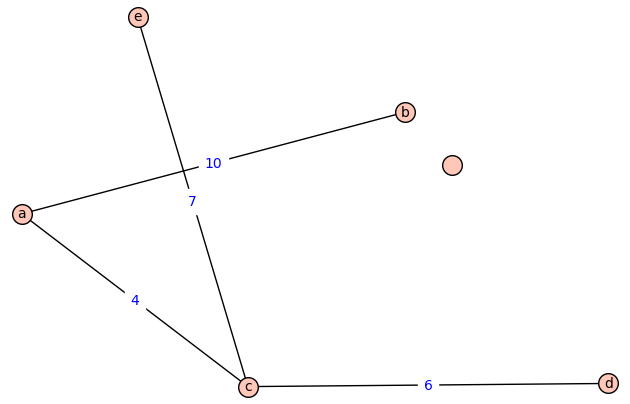

In [14]:
G=G1
v='a'

G.plot(save_pos=True,edge_labels=True).show()
pos=G.get_pos()

T,d=Dijkstra(G,v)

print(d)
T.plot(pos=pos,edge_labels=True).show()



G=G2
v='a'

G.plot(pos=pos,edge_labels=True).show()

T,d=Dijkstra(G,v)

print(d)
T.plot(pos=pos,edge_labels=True).show()

G=G2.copy()
G.add_vertex('g')
v = 'a'

G.plot(pos=pos,edge_labels=True).show()

T,d=Dijkstra(G,v)

print(d)
T.plot(pos=pos,edge_labels=True).show()


## Exercise 4

Use Dijkstra's algorithm to implement a function `eccentricity(G,v)` that computes the eccentricity of a vertex `v` in a weighted graph `G`. Recall that the eccentricity of a vertex is the maximal distance to `v` from any other vertex.

In [15]:
def eccentricity(G,v):
    #complete here the code (very short)
    _, dist = Dijkstra(G, v)
    return max(dist.values())

In [16]:
for v in G1.vertices():
    print(v, eccentricity(G1,v))

print()

for v in G2.vertices():
    print(v, eccentricity(G2,v))

a 6
b 7
c 8
e 8
d 5

a 11
b 10
c 9
e 11
d 10


Use Dijkstra's algorithm to compute the diameter of a Graph.

In [17]:
def diameter(G):

    #complete here the code (very short)
    
    return max([eccentricity(G, v) for v in G.vertices()])

In [18]:
print(diameter(G1))
print(diameter(G2))

8
11


The center of a connected weighted graph `G` is the set of vertices with minimum eccentricity.

Using Dijkstra, find the center of a graph. The function `center(G)` should return the vertices that form the center of `G` (as a `set`). You may assume that `G` is connected.

In [19]:
def center(G):
     
    #complete here the code (very short)
    e = { v: eccentricity(G, v) for v in G.vertices() }
    min_e = min(e.values())
    return set([v for v in e if e[v] == min_e])

In [20]:
print(center(G1))
print(center(G2))

{'d'}
{'c'}


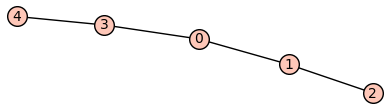

{0}


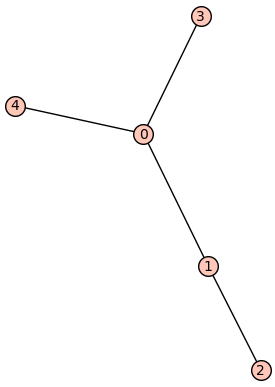

{0, 1}


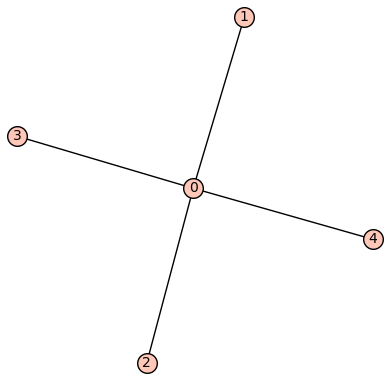

{0}


In [21]:
for T in graphs.trees(5):
    for u,v,l in T.edges():
        T.set_edge_label(u,v,1)
    T.show()

    print(center(T))

## Exercise 5

Implement a function that finds the center of an unweighted tree as dicussed in the lecture. Assume that the vertices are labelled from $0$ to $n-1$.

In [22]:
def TreeCenter(T):
    
    #complete here the code
    C = T.copy()
    
    while C.order() > 2 :
        C.delete_vertices([ v for v in C.vertices() if C.degree(v) == 1 ])
    
    return C.vertices()

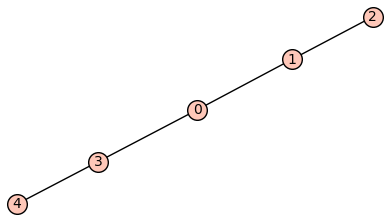

[0]


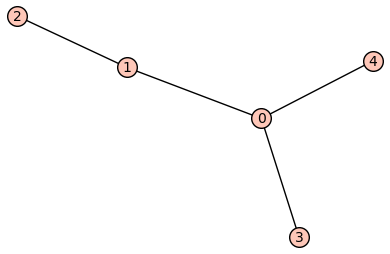

[0, 1]


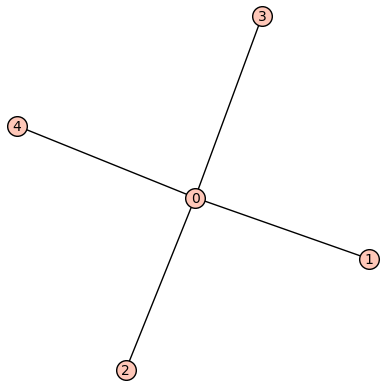

[0]


In [23]:
for T in graphs.trees(5):
    T.show()
    print(TreeCenter(T))

## Exercise 6

Implement the algorithm from the lecture that finds the center of a tree with arbitrary weights.

In [87]:
from sage.rings.infinity import Infinity

def down_ecc(T,marked,v,decc):
    #T = tree, marked = set of visited vertices, v = current vertex, decc = list of down eccentricities
    #complete here the code
    
    marked.add(v)
    for u in T.neighbors(v) :
        if u not in marked :
            down_ecc(T, marked, u, decc) #
            decc[v] = max(decc[v], decc[u] + T.edge_label(u, v))
    
    return None
    
def up_ecc(T,marked,v,uecc,decc):
    #T = tree, marked = set of visited vertices, v = current vertex, uecc = list of up eccentricities
    #complete here the code
    marked.add(v)
    child_list = dict()
    for u in T.neighbors(v) :
        if u not in marked :
            child_list[u] = T.edge_label(u, v) + decc[u]
    for u in T.neighbors(v) :
        if u not in marked :
            m = max([ child_list[w] for w in child_list if w != u ] + [0])
            uecc[u]=T.edge_label(u, v) + max(uecc[v], m)
            up_ecc(T,marked,u,uecc,decc)
    return None
    
    
def wTreeCenter(T):
    m=set() #start recursion with no vertices marked
    decc = { v: 0 for v in T.vertices() }
    down_ecc(T,m,0,decc)
    
    m=set() #start other recursion with no vertices marked
    uecc = { 0: 0 }
    up_ecc(T,m,0,uecc, decc)
    
    ecc=[ max(decc[i], uecc[i]) for i in range(T.order())] #this will be the list of (true) eccentricities

    #now compute the eccentricity of each vertex
    min_ecc = min(ecc)
    center=set([ i for i, v in enumerate(ecc) if v == min_ecc ])
    
    #if you know the eccentricities, you can compute the center
    
    return center

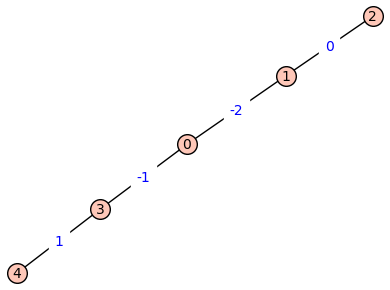

{0, 1, 2}


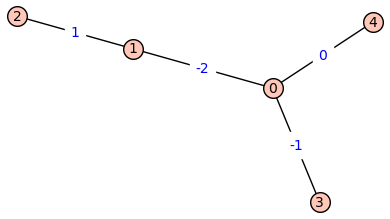

{0, 3, 4}


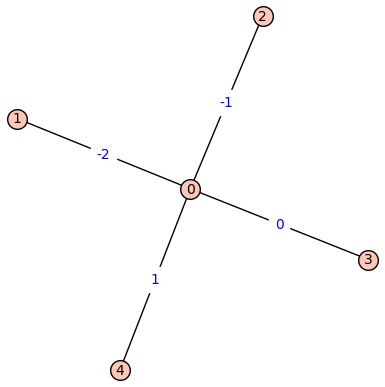

{1, 2}


In [88]:
from sage.rings.infinity import Infinity
for T in graphs.trees(5):
    n=T.order()
    decc=[0]*n
    uecc=[0]*n
    T.weighted(True)
    c=-2
    for e in T.edges():
        T.set_edge_label(e[0],e[1],c)
        c+=1
    T.show(edge_labels=True)
    print(wTreeCenter(T))


## Priority Queues

The previous algorithms require "finding the smallest element in a set" as a key step, be it finding the nearest vertex, or the shortest edge.

A naive way of doing this is looking at all elements of the set and finding the smallest, but it can be done faster using a "priority queue".

A priority queue is a data structure that sorts elements in a way that you can efficiently add elements, look at the minimum, and delete the minimum.

Python provides an efficient implementation of priority queues that uses [binary heaps](https://en.wikipedia.org/wiki/Binary_heap) in the library [heapq](https://docs.python.org/3/library/heapq.html).

In [89]:
from heapq import heapify, heappop, heappush

H = [(2,"A"),(1,"B"),(2,"C"),(3,"D")]

heapify(H)

print(H) #still looks like a list (but now it has an extra structure as a heap)

print(H[0], "is the smallest element")

s=heappop(H) #gives the smalles element and removes it from the queue
print(s, "was the smallest element")
    
print(H)
print(H[0], "is the smallest element")
#Notice that it sorts by the first component, and in case of tie, it sorts by second component.

heappush(H,(1,"E")) #adds a new element and mantains the heap structure 
#(use instead of append if you want to keep the heap structure) 

print(H)
print(H[0], "is the smallest element")




[(1, 'B'), (2, 'A'), (2, 'C'), (3, 'D')]
(1, 'B') is the smallest element
(1, 'B') was the smallest element
[(2, 'A'), (3, 'D'), (2, 'C')]
(2, 'A') is the smallest element
[(1, 'E'), (2, 'A'), (2, 'C'), (3, 'D')]
(1, 'E') is the smallest element


## Exercice 7

Implement Dijkstra's algorithm using a priority queue. 

In [111]:
from sage.rings.infinity import Infinity
from heapq import heapify, heappop, heappush


def fastDijkstra(G,v):
    dist={u:Infinity for u in G.vertices()} #this is a python dictionary
    dist[v]=0
   
    T=Graph()
   
    #complete here the code for Exercise 8
    parent = { u:v for u in G.vertices() }
    V = [ (value, key) for key, value in dist.items() ]
    heapify(V)
    
    d, w = heappop(V)
    first = True
    while (len(V) > 0 or first) and d < +Infinity :
        if len(V) == 0 :
            first = False
        T.add_vertex(w)
        if w != v :
            T.add_edge(w, parent[w], G.edge_label(w, parent[w]))
        
        for u in Set(G.neighbors(w)).difference(T.vertices()) :
            m = G.edge_label(w, u) + d
            if m < dist[u] :
                dist[u] = m
                parent[u] = w
        
        if first :
            V = [ (dist[key], key) for _, key in V ]
            heapify(V)
            d, w = heappop(V)
        
    return T,dist




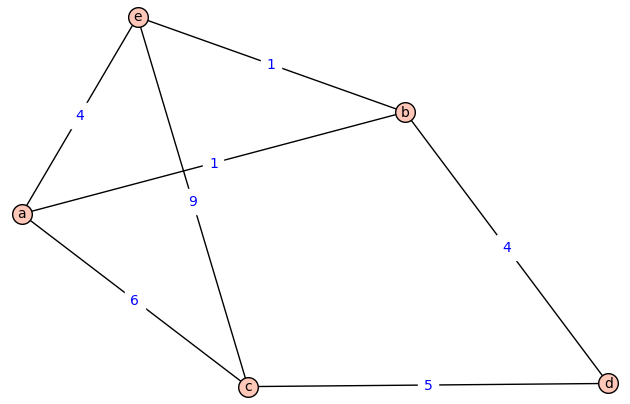

{'a': 0, 'b': 1, 'c': 6, 'e': 2, 'd': 5}


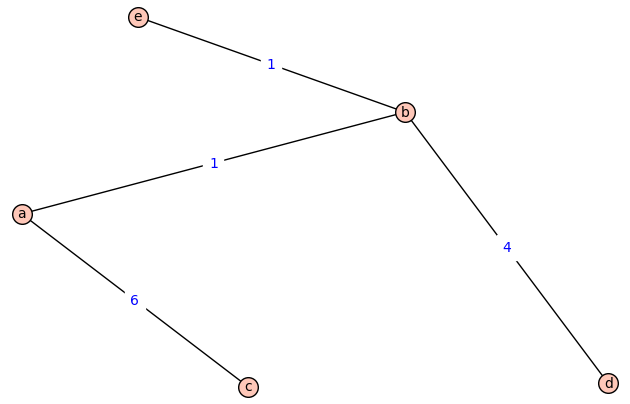

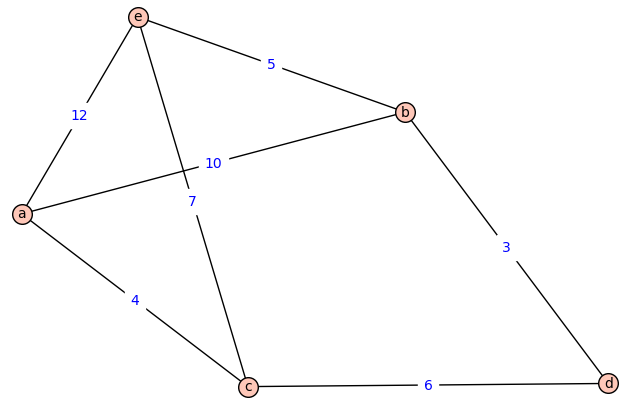

{'a': 0, 'b': 10, 'c': 4, 'e': 11, 'd': 10}


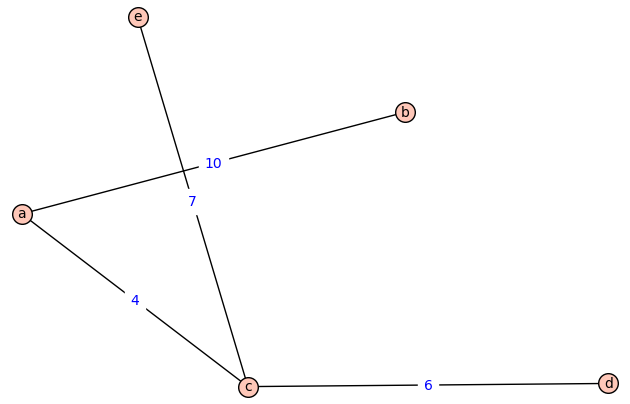

In [112]:
G=G1
v='a'

G.plot(save_pos=True,edge_labels=True).show()
pos=G.get_pos()

T,d=fastDijkstra(G,v)

print(d)
T.plot(pos=pos,edge_labels=True).show()



G=G2
v='a'

G.plot(pos=pos,edge_labels=True).show()

T,d=fastDijkstra(G,v)

print(d)
T.plot(pos=pos,edge_labels=True).show()